<a href="https://colab.research.google.com/github/VergaraC/supercomp/blob/master/material/aulas/01-introducao/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Introdução a SuperComputação

Como vimos na expositiva, uma solução de alto desempenho depende de três partes:

1. algoritmos eficientes
2. implementações eficientes
3. paralelismo

Na atividade de hoje vamos estudar o primeiro ponto e quantificar o efeito de algoritmos eficientes na resolução de um problema complexo. 

## Problemas estudados em SuperComputação

Em Desafios de Programação conhecemos a classe dos problemas NP-completo, que são aqueles que acreditamos não existir nenhum algoritmo determinístico que os resolvem em tempo polinomial. Ou seja, são problemas importantes cuja solução é difícil. Em geral temos classes de algoritmos para resolvê-los:

1. ótimos globais: algoritmo que encontra a solução "correta" do problema. 
2. ótimos locais: algoritmo que encontra uma solução "boa" e que não pode ser melhorada por pequenas modificações. 
3. aproximação: algoritmos que garantem estar "perto o suficiente" da solução ótima. Este tipo de algoritmo não nos interessa em SuperComputação.

Iremos analisar hoje 4 executáveis que resolvem o problema do [Caixeiro Viajante](https://en.wikipedia.org/wiki/Travelling_salesman_problem). 

1. `busca-local-1` - implementação de um método de busca rápida, porém não ótima.
1. `busca-local-1-par` - implementação paralela do programa acima.
2. `busca-local-2` - implementação alternativa do mesmo método acima. Os resultados de ambos são idênticos.
2. `busca-local-2-par` - implementação paralela do programa acima.

!!! important 
    Não estamos interessados no Caixeiro Viajante em si hoje. Queremos é comparar diferentes maneiras de resolvê-lo para entendermos o papel de técnicas de SuperComputação na velocidade de processamento e nos resultados obtidos. 


## Ferramental

Realizar testes de maneira automatizada é muito importante para quantificar os efeitos de diferentes algoritmos e técnicas de paralelismo. O snippet abaixo executa 

In [16]:
!chmod +x *busca-local-1
!chmod +x *busca-local-1-par
!chmod +x *busca-local-2
!chmod +x *busca-local-2-par

In [17]:
import subprocess
import time

with open('entradas-busca-local/in-0.txt') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.013542012000016257


Vamos agora praticar usar este snippet para executar nossos testes automaticamente. 

!!! example

    Crie uma função `roda_com_entrada(executavel, arquivo_in)` que roda o primeiro argumento usando como entrada o conteúdo do segundo argumento. Teste seu código com o executável `busca-local-1` e com o arquivo de entrada `in-0.txt` usado no exemplo acima.

    Sua função deverá devolver uma tupla `(stdout,time)` com `stdout` sendo a saída do programa e `time` seu tempo de execução em segundos. 

In [18]:
def roda_com_entrada(executavel, arquivo_in):
  with open('entradas-busca-local/'+arquivo_in) as f:
    start = time.perf_counter()
    proc = subprocess.run(['./'+executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    #print('Saída:', proc.stdout)
    #print('Stderr:', proc.stderr)
    #print('Tempo total(s):', end - start)
  return((proc.stdout, end - start))

## Algoritmos sequenciais

Com esse código, vamos criar um relatório interativo que roda nossos testes automaticamente e já plota informações prontas para nossas análises. Vamos começar examinando o desempenho do executável `busca-local-1`.

!!! example

    Rode o `busca-local` com os arquivos de entrada na pasta `entradas-busca-local`. Guarde os tempos em uma lista.

!!! example

    Leia o tamanho das entradas dos arquivos  na pasta `entradas-busca-local` e guarde em uma segunda lista.

!!! example 

    Plote o tempo de execução pelo tamanho da entrada usando `matplotlib`

Text(0, 0.5, 'tempo(seg)')

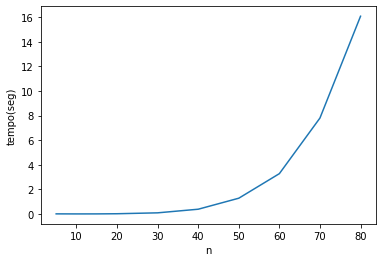

In [26]:
list_time_1= list()
list_size_1 = list()
for i in range(10):
  result = roda_com_entrada("busca-local-1","in-" + str(i) + ".txt")
  list_time_1.append(result[1])
  with open('entradas-busca-local/'+"in-" + str(i) + ".txt") as f:
    list_size_1.append(len(f.readlines())-1)
import matplotlib.pyplot as plt

plt.plot(list_size_1,list_time_1)
plt.xlabel("n")
plt.ylabel("tempo(seg)")

!!! example
    Repita os três passos acima para o executável `busca-local-2`. Finalize plotando os tempos de execução de ambos os executáveis no mesmo gráfico.

Text(0, 0.5, 'tempo(seg)')

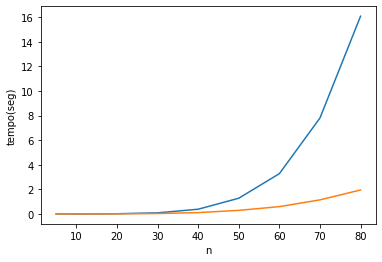

In [27]:
list_time_2= list()
list_size_2 = list()
for i in range(10):
  result = roda_com_entrada("busca-local-2","in-" + str(i) + ".txt")
  list_time_2.append(result[1])
  with open('entradas-busca-local/'+"in-" + str(i) + ".txt") as f:
    list_size_2.append(len(f.readlines())-1)

plt.plot(list_size_1,list_time_1)
plt.plot(list_size_2,list_time_2)
plt.xlabel("n")
plt.ylabel("tempo(seg)")

!!! example
    Segundo uma coleta de dados informal e altamente confiável, 93,17% dos alunos não colocam legendas nem títulos nos gráficos gerados. Faça isso agora. 

!!! question medium

    Interprete o gráfico que você gerou na linha de cima. 

!!! question medium
    Compare manualmente a saída dos programas. Existe diferença em seus resultados?

!!! question medium 
    Resgate seus conhecimentos de Desafios de Programação e explique a diferença entre os algoritmos.


## Algoritmos paralelos

Na discussão inicial da expositiva chegamos à conclusão de que se conseguimos realizar *N* operações em paralelo teremos um ganho de no máximo *N* vezes no desempenho de nosso programa. Nesta parte iremos estudar esta afirmação usando implementações paralelas dos algoritmos da seção anterior. 

!!! example
    Execute os algoritmos paralelos com as mesmas entradas e compare com suas versões paralelas. Use um gráfico para facilitar as comparações

[5, 10, 15, 20, 30, 40, 50, 60, 70, 80] [0.01408925099985936, 0.00952873999995063, 0.011557630999959656, 0.02408645700006673, 0.0970957089998592, 0.39112390699983735, 1.2855274540002029, 3.281564146999699, 7.80026332899979, 16.0701995229997]
[5, 10, 15, 20, 30, 40, 50, 60, 70, 80] [0.011384419000023627, 0.009688808999726461, 0.010137150999980804, 0.015183987999989768, 0.040642122000008385, 0.11676219899982243, 0.2981544429999303, 0.601877899000101, 1.1507070259999637, 1.9539069249999557]
[5, 10, 15, 20, 30, 40, 50, 60, 70, 80] [0.017328130999885616, 0.014501054999982443, 0.012629162999928667, 0.019144441000207735, 0.07554617899995719, 0.3022029520002434, 0.9815780379999524, 2.4317599660002998, 5.450390727999547, 11.923882836999837]
[5, 10, 15, 20, 30, 40, 50, 60, 70, 80] [0.010289746000125888, 0.01014198699976987, 0.011710222000147041, 0.01640864999990299, 0.03950375099975645, 0.10964317700018, 0.2818502129994158, 0.5550868020000053, 1.0664967249995243, 1.84591307699975]


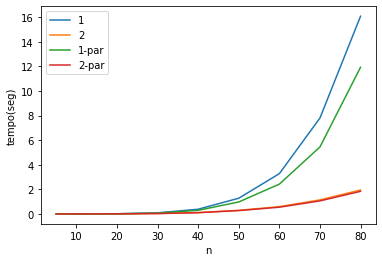

In [32]:
list_time_1_par= list()
list_size_1_par = list()
for i in range(10):
  result = roda_com_entrada("busca-local-1-par","in-" + str(i) + ".txt")
  list_time_1_par.append(result[1])
  with open('entradas-busca-local/'+"in-" + str(i) + ".txt") as f:
    list_size_1_par.append(len(f.readlines())-1)

list_time_2_par= list()
list_size_2_par = list()
for i in range(10):
  result = roda_com_entrada("busca-local-2-par","in-" + str(i) + ".txt")
  list_time_2_par.append(result[1])
  with open('entradas-busca-local/'+"in-" + str(i) + ".txt") as f:
    list_size_2_par.append(len(f.readlines())-1)

plt.plot(list_size_1,list_time_1)
plt.plot(list_size_2,list_time_2)
plt.plot(list_size_1_par,list_time_1_par)
plt.plot(list_size_2_par,list_time_2_par)

print(list_size_1,list_time_1)
print(list_size_2,list_time_2)
print(list_size_1_par,list_time_1_par)
print(list_size_2_par,list_time_2_par)
plt.xlabel("n")
plt.ylabel("tempo(seg)")
plt.legend(["1","2","1-par", "2-par"])

!!! question medium
    Compare os tempos obtidos. Qual foi o ganho médio? Quantos *núcleos* a máquina que você está usando possui? Responda comparando cada algoritmo sequencial com sua versão paralela.

Já estabelecemos que `busca-local-2` é melhor que `busca-local-1` por ser utilizar um algoritmo mais eficiente e vimos na prática a diferença entre um algoritmo $O(n^3)$ e um algoritmo $O(n^2)$. Vamos agora examinar a seguinte questão.

!!! cite "É possível usar paralelismo para tornar `busca-local-1-par` melhor que `busca-local-2`?"

!!! example
    Compare o desempenho de `busca-local-1-par` com `busca-local-2`. Faça um gráfico

!!! question medium
    Com base em seu gráfico acima, responda a pergunta: "É possível usar paralelismo para tornar busca-local-1-par melhor que busca-local-2?"

Vamos agora generalizar a pergunta:

!!! question medium
    Dados dois algoritmos com complexidades computacionais diferentes, sendo que o primeiro é inferior ao segundo. É possível usar paralelismo para tornar o primeiro mais rápido que o segundo para todos tamanhos de entrada? Assuma que você possui um número fixo de *núcleos*. 
